# Libraries

In [7]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu

# Applying otsu segmentation and normalize the image 

In [8]:
def normalizeImage(imgdir,sizeRows,sizeColumns):
    img = Image.open(imgdir)
    img = img.resize((sizeRows,sizeColumns),Image.ANTIALIAS)
    img  = np.asarray(img.convert('L'))
    val = threshold_otsu(np.array(img))
    otsuApplied = np.array(img)>val
    return otsuApplied.astype(int)

# Directories with training images

In [21]:
DIR1 = "Train/Sedan/"
DIR2 = "Train/buses/"
DIR3 = "Train/motorcycles/"
paths = [DIR1,DIR2,DIR3]

# Build vector for labels

In [14]:

def label_img(name):
    if "sedan" in name: #label for vehicules (specifically sedan)
        return np.array([1,0,0])
    elif "bus" in name: #Label for buses
        return np.array([0,1,0])
    elif "moto" in name: #Label for motorcycles
        return np.array([0,0,1])


# Create list with training data

In [15]:
IMG_SIZE = 300

def load_training_data():
    train_data = [] 
    for tempPath in paths:
        for img in os.listdir(tempPath):
            label = label_img(img)  # read the images and assigned the label
            path = os.path.join(tempPath, img)
            if "DS_Store" not in path: #validate for Mac Os users
                train_data.append([normalizeImage(path,IMG_SIZE,IMG_SIZE), label]) #normaliza data and 
    shuffle(train_data)
    return train_data

# Run Training Data

In [22]:
train_data = load_training_data()


2451


# Image after segmentation technique

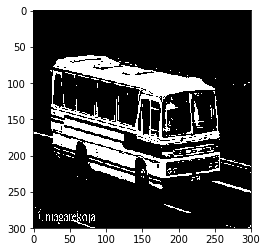

In [23]:
plt.imshow(train_data[10][0], cmap='gray', interpolation='nearest')

# Divede training columns and labels

In [24]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])
del train_data

# Libraries used for keras model

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Set up the keras model with the CNN

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation = 'softmax'))

# Compile the model

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

# Fit the model with training data 

In [28]:
model.fit(trainImages, trainLabels, batch_size = 10, epochs = 5, verbose = 1)

Epoch 1/5
2451/2451 [==============================] - 341s 139ms/step - loss: 0.8462 - acc: 0.6728
Epoch 2/5
2451/2451 [==============================] - 335s 137ms/step - loss: 0.4662 - acc: 0.8311
Epoch 3/5
2451/2451 [==============================] - 333s 136ms/step - loss: 0.3520 - acc: 0.8715
Epoch 4/5
2451/2451 [==============================] - 349s 142ms/step - loss: 0.2372 - acc: 0.9106
Epoch 5/5
2451/2451 [==============================] - 345s 141ms/step - loss: 0.2282 - acc: 0.9188


# Load specific image for be consult

In [32]:

def load_test_data(path):
    return np.array(normalizeImage(path,IMG_SIZE,IMG_SIZE)).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [37]:
ynew = model.predict_classes(load_test_data("/Users/jasonsolano/Downloads/carTest1.jpg"))
ynew

array([0])

# Directories for test Images

In [38]:
DIR1 = "Test/cars/"
DIR2 = "Test/buses/"
DIR3 = "Test/motorcycles/"
paths = [DIR1,DIR2,DIR3]
test_data = list()

# Function for load test images

In [39]:
IMG_SIZE = 300

def load_test_data():
    for tempPath in paths:
        for img in os.listdir(tempPath): #list the images of directory
            if('cars' in tempPath): #assigned labels
                label = np.array([1,0,0])
            elif('buses' in tempPath):
                label = np.array([0,1,0])
            else:
                label = np.array([0,0,1])
            path = os.path.join(tempPath, img)
            if "DS_Store" not in path: #validate for Mac Os users
                test_data.append([normalizeImage(path,IMG_SIZE,IMG_SIZE), label]) #normaliza data  
    shuffle(test_data)
    return test_data
load_test_data()
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])

/anaconda3/lib/python3.6/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [40]:
#Size of array with the test images
len(testImages)

100

# Function for get the accuracy with the test

In [41]:
loss, acc = model.evaluate(testImages, testLabels, verbose = 1)
print(acc * 100)

100/100 [==============================] - 11s 107ms/step
79.0
